# PS3-4: Semi-supervised EM

## Import Library

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os

import Full_Problem_Set.PS3.src.p04_gmm as gmm

## Global Parameter

In [37]:
PLOT_COLORS = ['red', 'green', 'blue', 'orange']  # Colors for your plots
K = 4           # Number of Gaussians in the mixture model
NUM_TRIALS = 3  # Number of trials to run (can be adjusted for debugging)
UNLABELED = -1  # Cluster label for unlabeled data points (do not change)

## Load Dataset

In [38]:
#Train
x_train, z_train = gmm.load_gmm_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS3/data/ds4_train.csv")

#Valid
x_valid, z_valid = gmm.load_gmm_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS3/data/ds4_valid.csv")

#Test
x_test, z_test = gmm.load_gmm_dataset("/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS3/data/ds4_test.csv")

## Plot Training set

In [39]:
def plot_dataset(x, z):
    plt.figure(figsize=(10, 8))
    plt.title('Training Dataset')
    plt.xlabel('x_1')
    plt.ylabel('x_2')

    for x_1, x_2, z_ in zip(x[:, 0], x[:, 1], z):
        color = 'gray' if z_ < 0 else PLOT_COLORS[int(z_)]
        alpha = 0.25 if z_ < 0 else 0.75
        plt.scatter(x_1, x_2, marker='.', c=color, alpha=alpha)


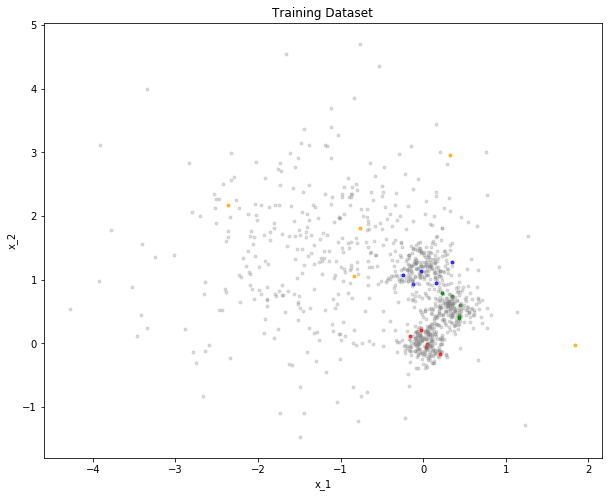

In [40]:
#Plot Training set
plot_dataset(x_train, z_train)

## Training semi-EM Model

### Training Algorithm

In [41]:
#Get Feature X Size
m, n = x_train.shape

In [42]:
def run_em(x, w, phi, mu, sigma):
    """
    Args:
        x: Design matrix of shape (m, n).
        w: Initial weight matrix of shape (m, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (n,).
        sigma: Initial cluster covariances, list of k arrays of shape (n, n).

    Returns:
        Updated weight matrix of shape (m, k) resulting from EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    eps = 1e-3  # Convergence threshold
    max_iter = 1000

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        pass  # Just a placeholder for the starter code
        # *** START CODE HERE
        # (1) E-step: Update your estimates in w

        # (2) M-step: Update the model parameters phi, mu, and sigma

        # (3) Compute the log-likelihood of the data to check for convergence.

        # By log-likelihood, we mean `ll = sum_x[log(sum_z[p(x|z) * p(z)])]`.
        # We define convergence by the first iteration where abs(ll - prev_ll) < eps.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        # *** END CODE HERE ***

    return w

In [43]:
def run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma):
    """
    Args:
        x: Design matrix of unlabeled examples of shape (m, n).
        x_tilde: Design matrix of labeled examples of shape (m_tilde, n).
        z: Array of labels of shape (m_tilde, 1).
        w: Initial weight matrix of shape (m, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (n,).
        sigma: Initial cluster covariances, list of k arrays of shape (n, n).

    Returns:
        Updated weight matrix of shape (m, k) resulting from semi-supervised EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    alpha = 20.  # Weight for the labeled examples
    eps = 1e-3   # Convergence threshold
    max_iter = 1000

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        pass  # Just a placeholder for the starter code
        # *** START CODE HERE ***
        # (1) E-step: Update your estimates in w
        # (2) M-step: Update the model parameters phi, mu, and sigma
        # (3) Compute the log-likelihood of the data to check for convergence.
        # Hint: Make sure to include alpha in your calculation of ll.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        # *** END CODE HERE ***

    return w

In [44]:
def main(is_semi_supervised, trial_num):
    """Problem 3: EM for Gaussian Mixture Models (unsupervised and semi-supervised)"""
    print('Running {} EM algorithm...'
          .format('semi-supervised' if is_semi_supervised else 'unsupervised'))

    # Load dataset
    train_path = os.path.join('..', 'data', 'ds4_train.csv')
    x, z = gmm.load_gmm_dataset(train_path)
    x_tilde = None

    if is_semi_supervised:
        # Split into labeled and unlabeled examples
        labeled_idxs = (z != UNLABELED).squeeze()
        x_tilde = x[labeled_idxs, :]   # Labeled examples
        z = z[labeled_idxs, :]         # Corresponding labels
        x = x[~labeled_idxs, :]        # Unlabeled examples

    # *** START CODE HERE ***
    # (1) Initialize mu and sigma by splitting the m data points uniformly at random
    # into K groups, then calculating the sample mean and covariance for each group

    # (2) Initialize phi to place equal probability on each Gaussian
    # phi should be a numpy array of shape (K,)

    # (3) Initialize the w values to place equal probability on each Gaussian
    # w should be a numpy array of shape (m, K)

    # *** END CODE HERE ***

    if is_semi_supervised:
        w = run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma)
    else:
        w = run_em(x, w, phi, mu, sigma)

    # Plot your predictions
    z_pred = np.zeros(m)
    if w is not None:  # Just a placeholder for the starter code
        for i in range(m):
            z_pred[i] = np.argmax(w[i])

    gmm.plot_gmm_preds(x, z_pred, is_semi_supervised, plot_id=trial_num)

### Training Model